In [1]:
## Importing pandas
import pandas as pd

## Reading the csv file
age_income = pd.read_csv('age_income.csv')
age_income.head()

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53


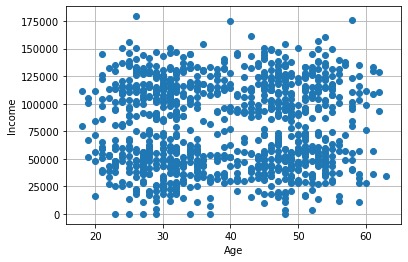

In [2]:
## Frist we visualize the data 
import matplotlib.pyplot as plt

plt.plot('age', 'income', 'o', data = age_income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid()
plt.show()

In [3]:
## Here we put the variables in the same scale
age_income['age_0_1'] = (age_income['age'] - age_income['age'].min()) / (age_income['age'].max() - age_income['age'].min())
age_income['income_0_1'] = (age_income['income'] - age_income['income'].min()) / (age_income['income'].max() - age_income['income'].min())
age_income.head()

,income,age,age_0_1,income_0_1
0,101743,58,0.888889,0.567465
1,49597,27,0.200000,0.276624
2,36517,52,0.755556,0.203671
3,33223,49,0.688889,0.185299
4,72994,53,0.777778,0.407119


In [4]:
## Importing sklearn 
from sklearn.cluster import KMeans

## Performing clustering 
age_income_cluster = KMeans(n_clusters = 4, n_init = 20)
age_income_cluster.fit(age_income[['age_0_1', 'income_0_1']])

## Appending cluster numbers
age_income['cluster'] = age_income_cluster.labels_
age_income.head()

,income,age,age_0_1,income_0_1,cluster
0,101743,58,0.888889,0.567465,1
1,49597,27,0.200000,0.276624,0
2,36517,52,0.755556,0.203671,2
3,33223,49,0.688889,0.185299,2
4,72994,53,0.777778,0.407119,2


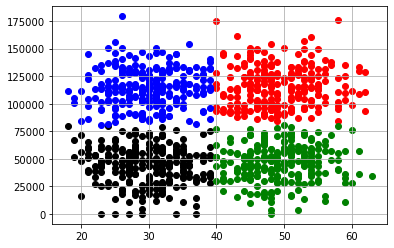

In [5]:
## Visualizing the data with cluster
colors = ['black', 'red', 'green', 'blue']

for c in age_income['cluster'].unique():
    
    temp = age_income[age_income['cluster'] == c]
    plt.scatter(temp['age'], temp['income'], color = colors[c])

plt.grid()
plt.show()

# k-means and PCA

In [6]:
## Importing pandas
import pandas as pd

## Reading the csv file
age_income_days = pd.read_csv('age_income_days.csv')
age_income_days.head()

,income,age,days_since_purchase
0,56432,31,492
1,137580,38,551
2,68285,59,304
3,93617,51,507
4,113441,54,509


In [7]:
## First we put the variables on the same scale (0-1 transformation)
age_income_days['income_0_1'] = (age_income_days['income'] - age_income_days['income'].min()) / (age_income_days['income'].max() - age_income_days['income'].min())
age_income_days['age_0_1'] = (age_income_days['age'] - age_income_days['age'].min()) / (age_income_days['age'].max() - age_income_days['age'].min())
age_income_days['days_since_purchase_0_1'] = (age_income_days['days_since_purchase'] - age_income_days['days_since_purchase'].min()) / (age_income_days['days_since_purchase'].max() - age_income_days['days_since_purchase'].min())

In [9]:
## Importing PCA
from sklearn.decomposition import PCA

## Performing PCA
PCA_md = PCA()
PCA_md.fit(age_income_days[['income_0_1', 'age_0_1', 'days_since_purchase_0_1']])

## Importing numpy to calculate components
import numpy as np

Components = pd.DataFrame(PCA_md.fit_transform(age_income_days[['income_0_1', 'age_0_1', 'days_since_purchase_0_1']]))
Components.head()

,0,1,2
0,-0.158888,0.012240,0.247001
1,-0.036245,0.458183,0.016149
2,0.403463,-0.174999,-0.146877
3,0.251268,0.204470,0.088106
4,0.306850,0.297386,0.009820


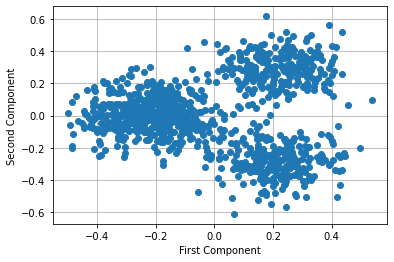

In [10]:
## Importing matplotlib
import matplotlib.pyplot as plt

## Plotting the first two components
plt.plot(Components.loc[:,0], Components.loc[:,1], 'o')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.grid()
plt.show()

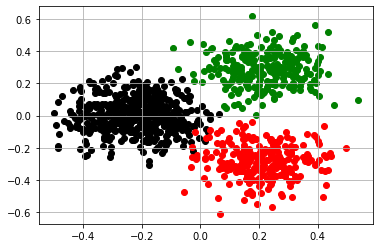

In [11]:
## Importing sklearn 
from sklearn.cluster import KMeans

## Performing clustering 
age_income_days_cluster = KMeans(n_clusters = 3, n_init = 20)
age_income_days_cluster.fit(age_income_days[['income_0_1', 'age_0_1', 'days_since_purchase_0_1']])

## Appending cluster numbers
age_income_days['cluster'] = age_income_days_cluster.labels_
Components['cluster'] = age_income_days_cluster.labels_

## Visualization of first two components with clusters
colors = ['black', 'red', 'green']

for c in age_income_days['cluster'].unique():
    
    temp = Components[Components['cluster'] == c]
    plt.scatter(temp[0], temp[1], color = colors[c])

plt.grid()
plt.show()

# Elbow Plot

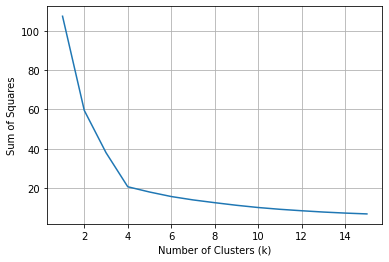

In [12]:
## Importing libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Reading the csv file
age_income = pd.read_csv('age_income.csv')

## Here we put the variables in the same scale
age_income['age_0_1'] = (age_income['age'] - age_income['age'].min()) / (age_income['age'].max() - age_income['age'].min())
age_income['income_0_1'] = (age_income['income'] - age_income['income'].min()) / (age_income['income'].max() - age_income['income'].min())

## Here we define a list to store the sum of squares
sum_of_squares = []

krange = list(range(1, 16))
X = age_income[['age_0_1', 'income_0_1']].values

## Looping through the different number of clusters
for i in krange:
    
    ## Here we define the k-means model
    cluster_md = KMeans(n_clusters = i, n_init = 20)
    cluster_md.fit_predict(X)
    
    ## Here we extract the cluster labels and centers
    cluster_assignments = cluster_md.labels_
    centers = cluster_md.cluster_centers_
    
    ## Here we compute the sum of squares
    sum_of_squares.append(np.sum((X - centers[cluster_assignments])**2))

## Visualizing the sum of squares for the different number of clusters    
plt.plot(krange, sum_of_squares)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squares')
plt.grid()
plt.show()

# Silhouette Plot

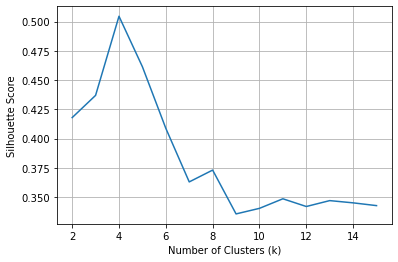

In [13]:
## Importing libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Reading the csv file
age_income = pd.read_csv('age_income.csv')

## Here we put the variables in the same scale
age_income['age_0_1'] = (age_income['age'] - age_income['age'].min()) / (age_income['age'].max() - age_income['age'].min())
age_income['income_0_1'] = (age_income['income'] - age_income['income'].min()) / (age_income['income'].max() - age_income['income'].min())

## Here we define a list to store the average silhouette
avg_silhouette = []

krange = list(range(2, 16))
X = age_income[['age_0_1', 'income_0_1']]

## Looping through the different number of clusters
for i in krange:
    
    ## Here we define the k-means model
    cluster_md = KMeans(n_clusters = i, n_init = 20)
    cluster_assignments = cluster_md.fit_predict(X)
    
    ## Here we extract the average silhouette
    silhouette_avg = silhouette_score(X, cluster_assignments)
    
    ## Here we append the average silhouette
    avg_silhouette.append(silhouette_avg)

## Visualizing the sum of squares for the different number of clusters    
plt.plot(krange, avg_silhouette)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()